In [35]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [69]:
df = pd.read_csv('../content/csv/FINALDATASET_EastSlopesNorth.csv')
df.set_index('Date', inplace=True)
df.head()

,Area,Above Treeline,At Treeline,Below Treeline,Yesterday Danger Above Treeline,Yesterday Danger At Treeline,Yesterday Danger Below Treeline,Max Air Temp 24hr,Total Snowfall 24hr,Delta SWE 24hr,Min Temp Diff 48hr,Max Windspeed 24hr,Was High Winds 24hr,Max Air Temp 72hr,Total Snowfall 72hr,Weighted Snowfall 96hr,Was Heavy Snowfall 24hr,Sum Max Temp 72hr
Date,,,,,,,,,,,,,,,,,,
2022-11-25,East Slopes North,2,1,1,0,0,0,42.000000,-0.666667,0.066667,-1.566667,0.000,0,0.000000,0.000000,0.000000,0,0.000000
2022-11-26,East Slopes North,3,3,2,2,1,1,30.733333,-0.666667,0.100000,-0.200000,5.085,0,0.000000,0.000000,0.000000,0,0.000000
2022-11-27,East Slopes North,2,2,1,3,3,2,30.533333,0.333333,0.233333,-6.400000,5.546,0,42.000000,-1.000000,0.000000,0,103.266667
2022-11-28,East Slopes North,2,1,1,2,2,1,20.766667,6.333333,0.500000,-15.500000,4.077,0,30.733333,6.000000,6.083333,0,82.033333
2022-11-29,East Slopes North,3,3,2,2,1,1,11.466667,0.000000,-0.100000,-0.266667,6.379,0,30.533333,6.666667,4.750000,0,62.766667


In [70]:
df.drop('Area', axis=1, inplace=True)

# df.drop(['Yesterday Danger Above Treeline', 'Yesterday Danger At Treeline', 'Yesterday Danger Below Treeline'], inplace=True, axis=1)

df.drop(['Above Treeline', 'Below Treeline'], inplace=True, axis=1)

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('At Treeline', axis=1))

scaled = scaler.transform(df.drop('At Treeline', axis=1))

scaled_df = pd.DataFrame(scaled, columns=df.drop('At Treeline', axis=1).columns)

In [77]:
scaled_df.head()

,Yesterday Danger Above Treeline,Yesterday Danger At Treeline,Yesterday Danger Below Treeline,Max Air Temp 24hr,Total Snowfall 24hr,Delta SWE 24hr,Min Temp Diff 48hr,Max Windspeed 24hr,Was High Winds 24hr,Max Air Temp 72hr,Total Snowfall 72hr,Weighted Snowfall 96hr,Was Heavy Snowfall 24hr,Sum Max Temp 72hr
0,-3.404744,-2.710680,-2.205348,1.631423,-0.453065,-0.479731,-0.313192,-1.701396,0.0,-4.976827,-0.329517,-0.347646,0.0,-4.176217
1,-0.263593,-1.316337,-0.752054,0.069664,-0.453065,-0.386268,-0.041719,0.175406,0.0,-4.976827,-0.329517,-0.347646,0.0,-4.176217
2,1.306982,1.472348,0.701240,0.041941,-0.047293,-0.012418,-1.273279,0.345555,0.0,1.358704,-0.570339,-0.347646,0.0,0.666313
3,-0.263593,0.078005,-0.752054,-1.311892,2.387342,0.735282,-3.080892,-0.196632,0.0,-0.340828,1.115417,1.506762,0.0,-0.329391
4,-0.263593,-1.316337,-0.752054,-2.601036,-0.182550,-0.947043,-0.054961,0.653003,0.0,-0.370997,1.275965,1.100316,0.0,-1.232872


In [72]:
from sklearn.model_selection import train_test_split

x = scaled_df
y = df['At Treeline']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=6)

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           1       0.44      0.78      0.56         9
           2       0.60      0.62      0.61        24
           3       0.00      0.00      0.00        10

    accuracy                           0.51        43
   macro avg       0.35      0.47      0.39        43
weighted avg       0.43      0.51      0.46        43



https://www.statology.org/sklearn-classification-report/

In [75]:
print(confusion_matrix(y_test_data, predictions))

[[ 7  2  0]
 [ 7 15  2]
 [ 2  8  0]]


https://www.geeksforgeeks.org/confusion-matrix-machine-learning/#

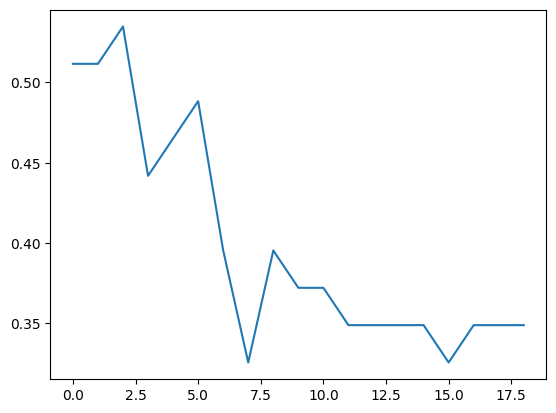

In [76]:
error_rates = []

for i in np.arange(1, 20): # 101

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))


plt.plot(error_rates)